# Linear Regression & Polynomial Fit
extracted small portion from Jake VanderPlas's post:
<br>https://jakevdp.github.io/pages/about.html
<br>https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html 

In [1]:
import os, sys
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# sklearn models need data as array of rows ("column" array)
# We use "np.newaxis" to convert array to column array.
# Here is an example of how it works
# https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it

aa = np.array(range(5))
print("aa:",np.shape(aa),":",aa)

bb = aa[:, np.newaxis]
print("bb:",np.shape(bb),":",bb)

aa: (5,) : [0 1 2 3 4]
bb: (5, 1) : [[0]
 [1]
 [2]
 [3]
 [4]]


###### -----------------------------------------------------------------------------------------------------

## Linear Regression

- Generate three sets of data (more and more noisy)
- Fit - and show that R2 goes to zero for bad data

Noise = 1
x: (50,) : [5.36633766 9.01057889 8.00975297]
y: (50,) : [ 5.26722907 12.34815711 10.45010082]


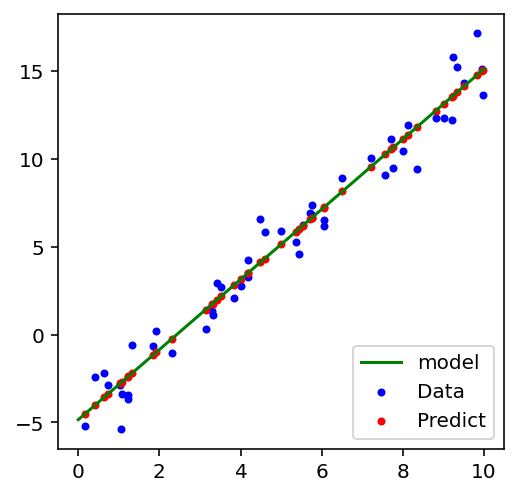

slope = 1.996, intercept = -4.844
Mean squared error : 1.32
R2 Variance score  : 0.96
------------------------------------------------------------
 
Noise = 2
x: (50,) : [5.36633766 9.01057889 8.00975297]
y: (50,) : [ 0.95865431 13.73603511 12.06551249]


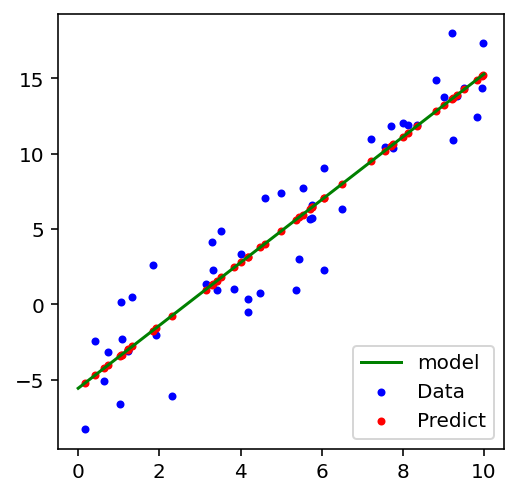

slope = 2.086, intercept = -5.568
Mean squared error : 5.54
R2 Variance score  : 0.88
------------------------------------------------------------
 
Noise = 3
x: (50,) : [5.36633766 9.01057889 8.00975297]
y: (50,) : [ 4.3902162  15.42355445  9.51980986]


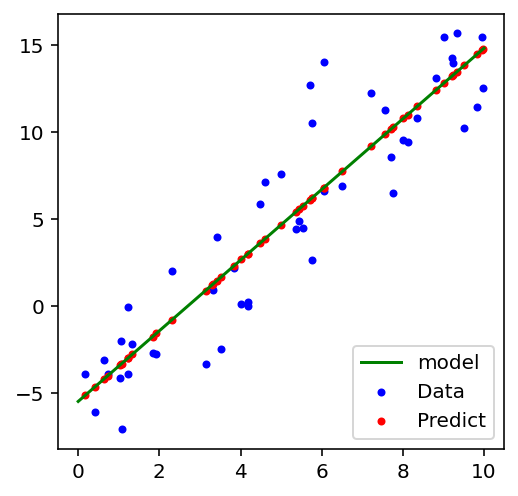

slope = 2.029, intercept = -5.496
Mean squared error : 6.70
R2 Variance score  : 0.85
------------------------------------------------------------
 
Noise = 5
x: (50,) : [5.36633766 9.01057889 8.00975297]
y: (50,) : [ 6.3259406   6.62911503 14.51965226]


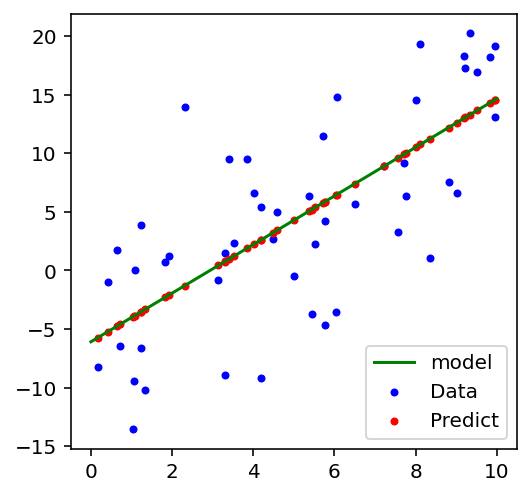

slope = 2.073, intercept = -6.085
Mean squared error : 36.90
R2 Variance score  : 0.51
------------------------------------------------------------
 
Noise = 10
x: (50,) : [5.36633766 9.01057889 8.00975297]
y: (50,) : [11.87495133 21.50254349 17.93597647]


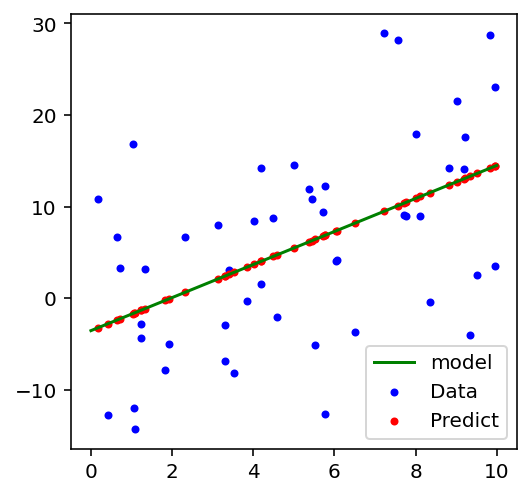

slope = 1.804, intercept = -3.555
Mean squared error : 86.67
R2 Variance score  : 0.25
------------------------------------------------------------
 
Noise = 100
x: (50,) : [5.36633766 9.01057889 8.00975297]
y: (50,) : [-200.09005015   22.42575681   37.4765416 ]


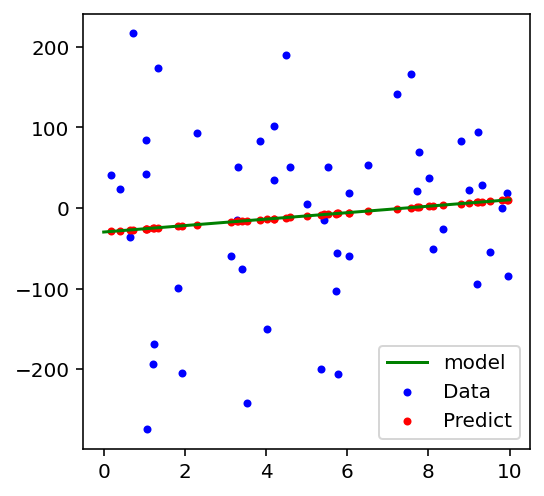

slope = 4.003, intercept = -29.884
Mean squared error : 12568.99
R2 Variance score  : 0.01
------------------------------------------------------------
 


In [3]:
# create two numpy arrays "x" and "y" of shape (50,)
# rng = np.random.RandomState(seed=1)  # specific seed - generates the same numbers
rng = np.random.RandomState(seed=None) # None - generate different numbers every time
x = 10 * rng.rand(50)                # 50 random numbers in [0,10] 
for Noise in [1,2,3,5,10,100]:
    y = (2 * x - 5) + Noise*rng.randn(50)    # 50 numbers between [-5, 15] 
                                         # linear function of x plus some normal noise
    print(f"Noise = {Noise}")
    print("x:",np.shape(x),":",x[:3])
    print("y:",np.shape(y),":",y[:3])

    model = LinearRegression(fit_intercept=True)
    model.fit(x[:, np.newaxis], y)   # x,y from above (50 points)
                                     # x - columnar, y - row
    # predicted values
    yp = model.predict(x[:, np.newaxis])

    # The coefficients
    slope     = model.coef_[0]
    intercept = model.intercept_

    # create numpy array of shape (1000,) 
    # with values in [0,10]
    xt = np.linspace(0, 10, 1000)
    yt = model.predict(xt[:, np.newaxis]) # this will draw a model line
    plt.rcParams["figure.figsize"] = (4, 4) # (width, height)
    fig, ax = plt.subplots()
    _ = ax.scatter(x,y,  marker='.', color='blue', label="Data");
    _ = ax.scatter(x,yp, marker='.', color='red', label="Predict");
    _ = ax.plot(xt, yt, color='green', label="model");
    _ = ax.legend(loc='lower right')
    _ = plt.show();
    print(f"slope = {slope:.3f}, intercept = {intercept:.3f}")
    print(f"Mean squared error : {mean_squared_error(y,yp):.2f}")
    print(f"R2 Variance score  : {r2_score(y, yp):.2f}")
    print("-"*60)
    print(" ")

###### -----------------------------------------------------------------------------------------------------

## Polynomial Fit Demo

- Generate polynomial function with random noise
- Fit it using polynomial fit

In [4]:
# generate 1000 random numbers with values in range [0-10]
rng = np.random.RandomState(seed=1)
N=1000
x = 10 * rng.rand(N)
x = np.where(x<0.0001, 0.0001, x)
print(f"x.shape = {x.shape}")
print(f"x[:10] = {np.round(x[:10],2)}")

x.shape = (1000,)
x[:10] = [4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46 3.97 5.39]


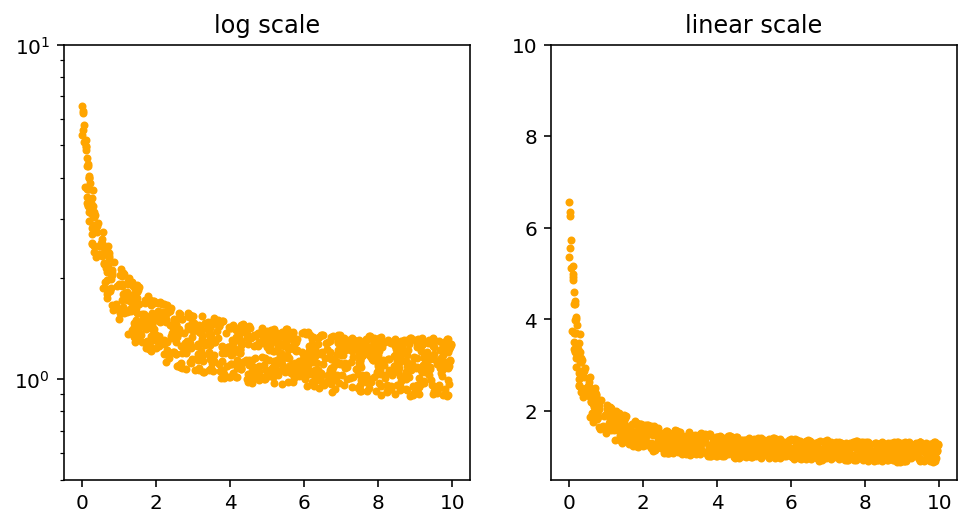

In [5]:
# add randomness +/- 0.2
x2 = 0.4 * rng.rand(N) - 0.2

# create y as a function of x and randomness
y = (1+1/(0.2+x))*(1+x2)

# plot y vs x
plt.rcParams["figure.figsize"] = (8, 4) # (width, height) 
fig,(ax1,ax2) = plt.subplots(1,2)
for ax in [ax1,ax2]:
    _ = ax.scatter(x,y, marker='.', color='orange')
    _ = ax.set_ylim(bottom=5e-1, top=10)
_ = ax1.set_yscale("log")
_ = ax2.set_yscale("linear")
_ = ax1.set_title("log scale")
_ = ax2.set_title("linear scale")
plt.show();

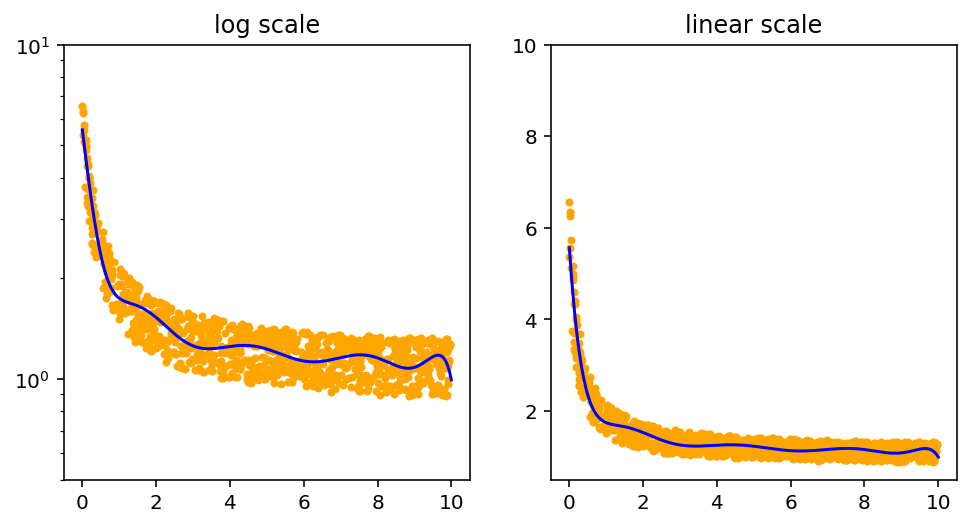

In [6]:
# polynomial fit
a  = np.array(x) # copy
b  = np.array(y) # copy

p9 = np.poly1d(np.polyfit(a,b,9))

xp = np.linspace(0,10,300)

plt.rcParams["figure.figsize"] = (8, 4) # (width, height) 
fig,(ax1,ax2) = plt.subplots(1,2)
for ax in [ax1,ax2]:
    _ = ax.scatter(x,y, marker='.', color='orange')
    _ = ax.plot(xp, p9(xp), color='blue')
    _ = ax.set_ylim(bottom=5e-1, top=10)
_ = ax1.set_yscale("log")
_ = ax2.set_yscale("linear")
_ = ax1.set_title("log scale")
_ = ax2.set_title("linear scale")
plt.show();